In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from astropy.io import ascii
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Pandas reads from *lots* of different data sources

data = pd.read_csv('galaxy1.csv', sep= ',')

In [5]:
#data = ascii.read('galaxy1.csv', format='csv', comment='#')   

#you can use both date writing code // ascii or pandas kullnarak 'csv' dosyasını okutabilirsin

In [6]:
data [:10]
data.describe()

,GalaxyID,GroupID,SnapNum,Redshift,CentreOfMass_x,CentreOfMass_y,CentreOfMass_z,GroupNumber,SubGroupNumber,MassType_Star,StarFormationRate,StellarVelDisp,Vmax
count,1.000000e+05,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,2.463029e+07,2.600028e+13,26.0,1.827099e-01,51.757342,52.362512,48.512345,2.484590e+04,40.226570,2.039991e+09,0.098431,30.094388,62.033466
std,2.499046e+07,4.835768e+08,0.0,1.131600e-13,29.002859,28.612115,27.276864,3.818514e+04,194.912566,1.674386e+10,0.579153,18.190084,36.780637
min,3.000000e+00,2.600000e+13,26.0,1.827099e-01,0.000653,0.000547,0.000605,1.000000e+00,0.000000,2.137226e+07,0.000000,0.000000,7.662674
25%,4.343981e+06,2.600000e+13,26.0,1.827099e-01,25.934936,29.471976,26.204446,6.350000e+02,0.000000,3.517294e+07,0.000000,21.444459,43.553123
50%,8.038379e+06,2.600010e+13,26.0,1.827099e-01,54.569580,53.908898,48.291723,1.154850e+04,0.000000,7.200317e+07,0.000000,25.287093,51.409028
75%,5.620931e+07,2.600040e+13,26.0,1.827099e-01,77.051437,77.564705,68.167470,3.634925e+04,5.000000,2.754987e+08,0.013831,31.410206,66.266855
max,6.545480e+07,2.601510e+13,26.0,1.827099e-01,99.999020,99.998860,99.999664,1.176619e+06,13473.000000,1.592714e+12,65.187965,629.105700,1106.510500


In [7]:
data.head()

,GalaxyID,GroupID,SnapNum,Redshift,CentreOfMass_x,CentreOfMass_y,CentreOfMass_z,GroupNumber,SubGroupNumber,MassType_Star,StarFormationRate,StellarVelDisp,Vmax
0,21379523,26000000000000,26,0.18271,5.927712,75.501650,47.334126,1,0,1.592714e+12,51.303875,629.10570,1106.51050
1,21730537,26000000000003,26,0.18271,52.264893,5.048345,20.154005,4,0,1.583770e+12,36.438904,445.49063,996.71094
2,21242352,26000000000004,26,0.18271,10.774976,81.668144,55.286396,5,0,1.234117e+12,23.436750,401.04062,841.13680
3,21573588,26000000000002,26,0.18271,9.288896,35.034924,54.263535,3,0,1.189408e+12,65.187965,448.11966,925.92957
4,21109762,26000000000001,26,0.18271,18.618362,79.838490,54.131245,2,0,1.039220e+12,14.379163,387.37280,818.19430


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
def filterer(logmmin, logmmax):
    """
    this function 
    keeps the central galaxies with non-zero SFR with logmstar 
    between logmmin, logmmax
    
    return:
    all galaxies with the above properties
    red galaxies with the baove properties
    blue galaxies with the above properties
    """
    
    central_mask = (data["SubGroupNumber"]==0)&(data["StarFormationRate"]!=0)
    array = data.as_matrix()
    array = array[central_mask]
    array[:,10] = np.log10(array[:,10]/array[:,9]) #biz burdan log SSFR
    array[:,9] = np.log10(array[:,9]) #buda logMstar
    
    mstar_mask = (array[:,9]>logmmin)&(array[:,9]<logmmax)
    
    median_logssfr = np.median(array[:,10])
    
    red_mask = array[:,10] < median_logssfr
    blue_mask = array[:,10] > median_logssfr

        
    red = array[red_mask,:]
    blue = array[blue_mask,:]
    tot= array 
    
    return tot,red, blue
    

In [44]:
tot , red , blue = filterer(10,10.5)

In [45]:
red.shape

(15242, 13)

In [12]:
X = data["CentreOfMass_x"]
Y = data["CentreOfMass_y"]
Z = data ["CentreOfMass_z"]

In [13]:
print tot[:,4] #yazıdığımızda bu bize tot'daki yani dat 4 kalonu vericek.
print tot[:,5]
print tot[:,6]

[ 5.927712 52.264893 10.774976 ... 74.19333  77.36265  62.922394]
[75.50165   5.048345 81.668144 ... 26.00517  87.33227  12.843445]
[47.334126 20.154005 55.286396 ... 31.712448 49.537987 25.269644]


In [14]:
blue.shape

(15242, 13)

In [15]:
tot.shape

(30485, 13)

In [16]:
print red[:,4]
print red[:,5]
print red[:,6]

[ 5.927712 52.264893 10.774976 ... 18.709337 71.28754  54.96809 ]
[75.50165   5.048345 81.668144 ... 20.581894 48.74289  83.14084 ]
[47.334126 20.154005 55.286396 ... 19.692532 56.06172  75.23269 ]


In [31]:

def func(amin,bmax,data1,data2):
    
    """this function returns average number of 
    data1 points and data2 points between amin and bmax"""
    
    zebra = []

    for point in data1:
    
        distance_to_point = np.sum((point[None,:]-data2)**2  ,  axis = 1 )**0.5 #distance from all the points in fake data to the point
        A = (amin < distance_to_point) & ( distance_to_point < bmax)
        x = len(distance_to_point[A])
        zebra.append(x)
    zebra= np.array(zebra)
        
    return np.average(zebra)


In [46]:
def func2(logmin,logmmax, galaxy_type1, galaxy_type2):
    """
    it returns func at (2,4),(4,6) etc. sonun da (2,4) için net sonucu verir.  """
    
    tot, red, blue = filterer(logmin, logmmax)
    
    print tot.shape
    print red.shape
    print blue.shape
    
    
    if galaxy_type1 == 'red':
        FAKE_DATA1 = red[:,4:7] #bu demek ki biz tüm kolonı tutuyoruz ve sadece 4-7 arasındakı kolonları seçiyoruz.
    if galaxy_type1 == 'blue':
        FAKE_DATA1 = blue[:,4:7]
        
    if galaxy_type2 == 'red':
        FAKE_DATA2 = red[:,4:7]
    if galaxy_type2 == 'blue':
        FAKE_DATA2 = blue[:,4:7]
    if galaxy_type2 == 'tot':
        FAKE_DATA2 = tot[:,4:7]
    
    listnew = []
    lister = [2,4,6,8,10,12]
    for i in lister:
        listnew.append(func(i,i+2,FAKE_DATA1,FAKE_DATA2))
    return listnew

In [48]:
tot_around_red = func2(10,10.5,'red','tot')
red_around_red = func2(10,10.5,'red','red')

(30485, 13)
(15242, 13)
(15242, 13)
(30485, 13)
(15242, 13)
(15242, 13)


In [49]:
tot_around_blue = func2(10,10.5,'blue','tot')
blue_around_blue = func2(10,10.5,'blue','blue')

(30485, 13)
(15242, 13)
(15242, 13)
(30485, 13)
(15242, 13)
(15242, 13)


In [51]:
fred_fraction = np.array(red_around_red)  / np.array(tot_around_red)

In [52]:
fblue_fraction = np.array(blue_around_blue)  / np.array(tot_around_blue)

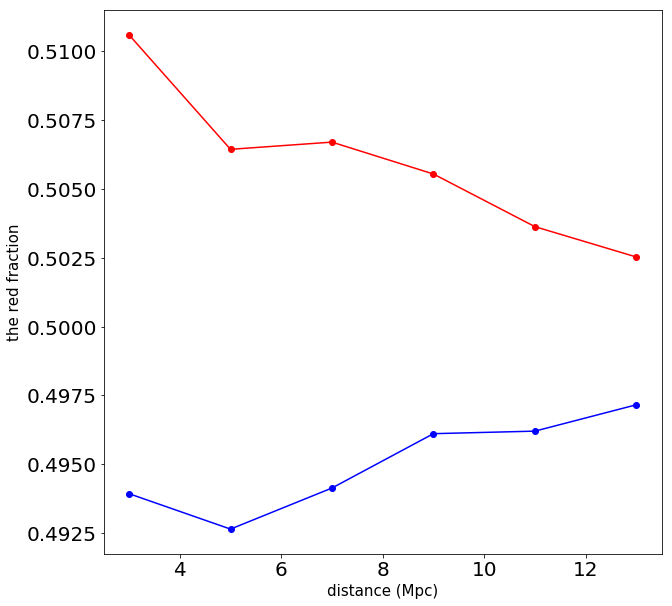

In [56]:
plt.figure(figsize=(10,10))

#x = [2,4,6,8,10,12,14]
x = [3,5,7,9,11,13]
y1 = fred_fraction
y2 = fblue_fraction
plt.plot(x,y1, marker = "o", color ="r")
plt.plot(x,y2, marker = "o", color ="b")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("the red fraction",fontsize=15)
plt.xlabel("distance (Mpc)",fontsize=15)
plt.savefig("figure1.pdf")